In [10]:
ls ../scripts/8TeV_inclusive/

fit_result_ccombinedSecondaryVertexBJetTags_0.679_first.root
fit_result_ccombinedSecondaryVertexBJetTags_0.898_first.root
fit_result_cjetProbabilityBJetTags_0.275_first.root
fit_result_cjetProbabilityBJetTags_0.545_first.root
fit_result_cjetProbabilityBJetTags_0.79_first.root
fit_result_combinedSecondaryVertexBJetTags_0.0_first.root
fit_result_combinedSecondaryVertexBJetTags_0.244_4jets.root
fit_result_combinedSecondaryVertexBJetTags_0.244_first.root
fit_result_combinedSecondaryVertexBJetTags_0.679_4jets.root
fit_result_combinedSecondaryVertexBJetTags_0.679_first.root
fit_result_combinedSecondaryVertexBJetTags_0.898_4jets.root
fit_result_combinedSecondaryVertexBJetTags_0.898_first.root
fit_result_combinedSecondaryVertexBJetTags_1.05263157895_first.root
fit_result_combinedSecondaryVertexBJetTags_10.5263157895_first.root
fit_result_combinedSecondaryVertexBJetTags_11.5789473684_first.root
fit_result_combinedSecondaryVertexBJetTags_12.6315789474_first.root
fit_result_combinedSecondaryVerte

In [27]:
from rootpy.io import root_open
from rootpy.plotting import Hist, Canvas
from ROOT import TF1, TPaveText

lumi = 19789.0
option = "first"
dir_path = "../scripts/8TeV_inclusive/"
tag_dict = { "CSVL": ["combinedSecondaryVertexBJetTags", 0.244 ],
             "CSVM": ["combinedSecondaryVertexBJetTags", 0.679 ],
             "CSVT": ["combinedSecondaryVertexBJetTags", 0.898 ],
             "JPL": ["jetProbabilityBJetTags", 0.275 ],
             "JPM": ["jetProbabilityBJetTags", 0.545 ],
             "JPT": ["jetProbabilityBJetTags", 0.79 ],
             "TCHPT" : ["trackCountingHighPurBJetTags", 3.41 ]}

b-tagging efficiency mc 0.406990298583 \pm 0.00206812026042 
b-tagging efficiency data 0.406990298583 \pm 0.00206812026042 
scale factor 0.948773879265 \pm 0.00482119227189 
ttbar xs 224.622867724 \pm 1.36970170109 
kappa 1.07865440944 \pm 0.00941202117778 


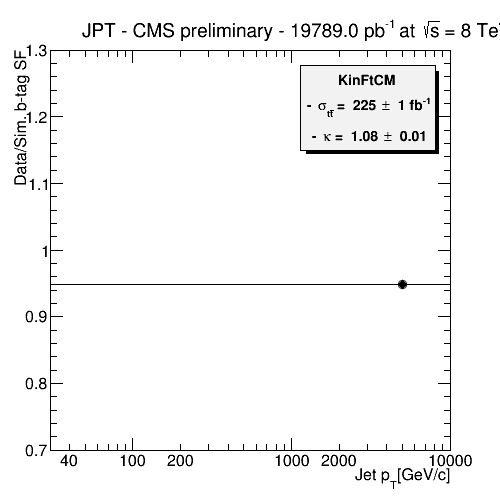

In [38]:

c = Canvas(500,500)

s_name = "JPT"
tagger = tag_dict[s_name][0]
wp = tag_dict[s_name][1]


c_bins = [30, 10000]
bins = [30, 10000]

c_hist = Hist(c_bins)
c_hist.SetStats(False)
c_hist.SetAxisRange(0.7,1.3,"Y")
c_hist.GetXaxis().SetMoreLogLabels()
c_hist.GetXaxis().SetNoExponent()
c_hist.SetXTitle("Jet p_{T}[GeV/c]")
c_hist.SetYTitle("Data/Sim. b-tag SF")
c_hist.SetTitle(s_name + " - CMS preliminary - {}".format(lumi) +" pb^{-1} at #sqrt{s} = 8 TeV ")
c_hist.Draw()

root_file = root_open("{}fit_result_{}_{}_{}.root".format(dir_path, tagger, wp, option))
fit_result = root_file.fitresult_sim_kin_pdf_data_hist
i_pars = fit_result.floatParsInit()
f_pars = fit_result.floatParsFinal()
hist = Hist( bins, title = "FtCM")
for i in range(0,len(bins)-1):
    mc_val = i_pars[f_pars.index("b_tag_eff_{}".format(i))].getVal()
    data_val = f_pars[f_pars.index("b_tag_eff_{}".format(i))].getVal()
    data_err = f_pars[f_pars.index("b_tag_eff_{}".format(i))].getError()
    print "b-tagging efficiency mc {} \pm {} ".format(data_val,data_err)
    print "b-tagging efficiency data {} \pm {} ".format(data_val,data_err)
    sf = data_val/mc_val
    sf_err = data_err/mc_val
    print "scale factor {} \pm {} ".format(sf,sf_err)

    hist[i+1] = (sf,sf_err)
hist.Draw("SAME E1")

ttbar_xs = f_pars[f_pars.index("xsec_TTbar_Summer13")].getVal()
ttbar_xs_err = f_pars[f_pars.index("xsec_TTbar_Summer13")].getError()
print "ttbar xs {} \pm {} ".format(ttbar_xs,ttbar_xs_err)
bkg_norm = f_pars[f_pars.index("kappa")].getVal()
bkg_norm_err = f_pars[f_pars.index("kappa")].getError()
print "kappa {} \pm {} ".format(bkg_norm,bkg_norm_err)
text_box = TPaveText(0.60,0.7,0.87,0.87, "NDC")
text_box.AddText("KinFtCM")
text_box.AddText(" - #sigma_{t#bar{t}}" + 
                 " = {:4.0f} #pm {:2.0f}".format(ttbar_xs, ttbar_xs_err) +
                 " fb^{-1}")
text_box.AddText(" - #kappa" + 
                 " = {:5.2f} #pm {:5.2f}".format(bkg_norm,bkg_norm_err ))
text_box.Draw()

c.SetLogx(1)
c.GetPad(0).SetTickx()
c.GetPad(0).SetTicky()
t = c.GetPrimitive("title")
t.SetTextSize(0.04)
t.SetBBoxCenterX(300)
t.SetBBoxCenterY(30)
c